# Explore here

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import joblib
import os
import matplotlib as plt 

# Import necessary libraries
import pandas as pd
import numpy as np
import torch
from transformers import RobertaTokenizer
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


#import custom class
from custom_class_final_model import CustomRobertaModel


In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv'
df = pd.read_csv(url)

In [3]:
display(df.head())

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [5]:
num_duplicates = df.duplicated(subset=["review"]).sum()
print(num_duplicates)

0


In [6]:
df["polarity"].value_counts()

polarity
0    584
1    307
Name: count, dtype: int64

In [7]:
# Remove 'package_name' column
df.drop('package_name', axis=1, inplace=True)

In [8]:
# Remove missing values (if any)
df.dropna(subset=['review', 'polarity'], inplace=True)

In [9]:
# Clean text data: strip and lowercase
df['review'] = df['review'].str.strip().str.lower()

In [10]:
# Split the dataset into features and labels
X = df['review']
y = df['polarity']

# Divide the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Transform the text into a word count matrix
vec_model = CountVectorizer(stop_words='english')

# Fit and transform on training data
X_train_counts = vec_model.fit_transform(X_train).toarray()

# Transform the test data
X_test_counts = vec_model.transform(X_test).toarray()


Gaussian Naive Bayes model


In [12]:
gnb = GaussianNB()
gnb.fit(X_train_counts, y_train)

# Predict on test data
y_pred_gnb = gnb.predict(X_test_counts)


In [13]:
# Evaluate GaussianNB
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("GaussianNB Classification Report:")
print(classification_report(y_test, y_pred_gnb))

GaussianNB Accuracy: 0.8044692737430168
GaussianNB Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       126
           1       0.69      0.62      0.65        53

    accuracy                           0.80       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.80      0.80      0.80       179



Multinomial Naive Bayes model


In [14]:
mnb = MultinomialNB()
mnb.fit(X_train_counts, y_train)

# Predict on test data
y_pred_mnb = mnb.predict(X_test_counts)

In [15]:
# Evaluate MultinomialNB
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("MultinomialNB Classification Report:")
print(classification_report(y_test, y_pred_mnb))

MultinomialNB Accuracy: 0.8156424581005587
MultinomialNB Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       126
           1       0.73      0.60      0.66        53

    accuracy                           0.82       179
   macro avg       0.79      0.75      0.77       179
weighted avg       0.81      0.82      0.81       179



Bernoulli Naive Bayes model

In [16]:
bnb = BernoulliNB()
bnb.fit(X_train_counts, y_train)

# Predict on test data
y_pred_bnb = bnb.predict(X_test_counts)

In [17]:
# Evaluate BernoulliNB
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("BernoulliNB Classification Report:")
print(classification_report(y_test, y_pred_bnb))

BernoulliNB Accuracy: 0.770949720670391
BernoulliNB Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       126
           1       0.70      0.40      0.51        53

    accuracy                           0.77       179
   macro avg       0.74      0.66      0.68       179
weighted avg       0.76      0.77      0.75       179



best model performance: MultinomialNB 

In [18]:
# Build and train the Random Forest model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_counts, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Predict on test data
y_pred_rfc = rfc.predict(X_test_counts)

In [20]:
# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rfc))

Random Forest Accuracy: 0.7988826815642458
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       126
           1       0.64      0.74      0.68        53

    accuracy                           0.80       179
   macro avg       0.76      0.78      0.77       179
weighted avg       0.81      0.80      0.80       179



Multinomial Naive Bayes has a slightly higher overall accuracy than Random Forest. For the positive class, Random Forest achieves higher recall, meaning it identifies more actual positive cases. However, Multinomial Naive Bayes has better precision, indicating fewer false positives. 

save model

In [21]:
# Save the Random Forest model
joblib.dump(rfc, r'C:\Users\aless\Desktop\4 geeks projects\ale-naive-bayes\models\random_forest_model.joblib')

# Save the vectorizer as well
joblib.dump(vec_model, r'C:\Users\aless\Desktop\4 geeks projects\ale-naive-bayes\models\count_vectorizer.joblib')

['C:\\Users\\aless\\Desktop\\4 geeks projects\\ale-naive-bayes\\models\\count_vectorizer.joblib']

Improving results further . Using Roberta Fine tuned during the final project. 

In [23]:
# Load the pre-trained model and tokenizer from Hugging Face
model_name = "AleOfDurin/final_retrained_model"
# Load the model and tokenizer from the Hugging Face Hub
model_custom = CustomRobertaModel.from_pretrained(model_name)
tokenizer = RobertaTokenizer.from_pretrained(model_name)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
# extract reviews and labels 
reviews = df['review'].tolist()
labels = df['polarity'].tolist()

In [25]:
# Tokenize the reviews
encoded_inputs = tokenizer(
    reviews,
    padding=True,
    truncation=True,
    max_length=128,  # Adjust max_length as per your model's requirement
    return_tensors='pt'
)

In [26]:
# Convert labels to tensors
labels = torch.tensor(labels)


In [27]:
# Create a TensorDataset and DataLoader
dataset = TensorDataset(
    encoded_inputs['input_ids'],
    encoded_inputs['attention_mask'],
    labels
)

batch_size = 32  # Adjust batch size as per your memory constraints

dataloader = DataLoader(dataset, batch_size=batch_size)


In [33]:
# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []
y_proba = []  # Store probabilities for ROC-AUC

model_custom.eval()  # Set model to evaluation mode

with torch.no_grad():
    for batch in dataloader:
        input_ids, attention_mask, labels = batch  # No need to move to device
        
        # Run inference
        logits = model_custom(input_ids=input_ids, attention_mask=attention_mask)
        
        # Depending on the shape of logits, process accordingly
        if logits.dim() == 2 and logits.size(1) == 2:
            # Model outputs logits for two classes
            probabilities = torch.softmax(logits, dim=-1)
            predictions = torch.argmax(probabilities, dim=-1)
            positive_probs = probabilities[:, 1]
        else:
            # Model outputs a single logit
            probabilities = torch.sigmoid(logits.squeeze())
            predictions = (probabilities >= 0.5).long()
            positive_probs = probabilities
        
        # Store predictions, true labels, and probabilities
        all_preds.extend(predictions.numpy())
        all_labels.extend(labels.numpy())
        y_proba.extend(positive_probs.numpy())


In [34]:
# Convert lists to NumPy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
y_proba = np.array(y_proba)

In [42]:
# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
report = classification_report(all_labels, all_preds, target_names=['Negative', 'Positive'])
conf_matrix = confusion_matrix(all_labels, all_preds)
roc_auc = roc_auc_score(all_labels, y_proba)


In [43]:
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")
print("Classification Report:")
print(report)

Accuracy: 0.8440
ROC-AUC: 0.8944

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.91      0.88       584
    Positive       0.80      0.72      0.76       307

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.84      0.84      0.84       891



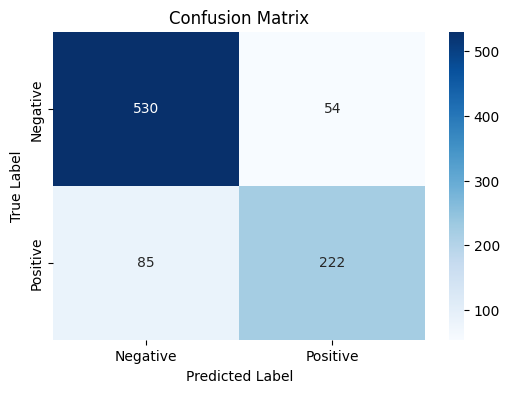

In [44]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Conclusion: The RoBERTa model has a higher overall accuracy and better precision and F1-score for the positive class compared to the Random Forest model. While Random Forest has slightly higher recall for the positive class (0.74 vs. 0.72), RoBERTa's superior precision leads to a better balance between precision and recall, as reflected in the higher F1-score.

Unbalanced Dataset: Approximately 65% negative and 35% positive reviews. class imbalance is likely affecting the RoBERTa model's performance since higher scores were achieved on a balanced dataset. 